In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import sklearn

from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

pd.plotting.register_matplotlib_converters()
%matplotlib inline

#### IMPORTANT

In the `clustering_df` I have already dropped the features which had more than 60% missing values. This Dataframe doesnot contain some unnecessary columns such as `'id', 'pymnt_plan', 'emp_title', 'earliest_cr_line'`.

In this dataframe some date columns such as `issue_d, last_pymnt_d, next_pymnt_d` has been transformed and the `year` value has been extracted from them. In this data frame they are named as `Issue_Year, last_payment_year`.

Finally the encoded version of categorical columns is present in this Dataframe. Some of the categorical columns such as `'application_type','term','hardship_flag','initial_list_status'` is encoded by using `pd.get_dummies` function and the remaining is encoded by `Ordinal Encoder`. 

Outliers are still present in this dataset.

The `clustering_df` dataframe also doesnot contain `loan_status`

In [345]:
clustering_df=pd.read_csv('data_for_clustering.csv')
clustering_df.head()

,home_ownership,loan_amnt,int_rate,installment,grade,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,Issue_Year,last_payment_year,application_type_Individual,application_type_Joint App,term_36 months,term_60 months,hardship_flag_N,hardship_flag_Y,initial_list_status_f,initial_list_status_w
0,1.0,35000,0.1505,1214.15,1.0,110000.0,1.0,1.0,9.13,0,...,2017,2020,1,0,1,0,1,0,0,1
1,1.0,21000,0.1408,489.51,1.0,54000.0,2.0,1.0,20.67,0,...,2017,2019,1,0,0,1,1,0,0,1
2,2.0,20000,0.1408,466.20,1.0,74000.0,1.0,2.0,18.33,0,...,2017,2020,1,0,0,1,1,0,0,1
3,1.0,16000,0.1903,586.74,2.0,58000.0,3.0,1.0,29.05,0,...,2017,2019,1,0,1,0,1,0,0,1
4,2.0,24000,0.0890,497.04,3.0,94020.0,1.0,1.0,23.22,0,...,2013,2019,1,0,0,1,1,0,0,1


In [346]:
clustering_df.shape

(77159, 89)

In [347]:
transformed_features=['application_type_Individual','application_type_Joint App','term_36 months','term_60 months','hardship_flag_N','hardship_flag_Y','initial_list_status_f','initial_list_status_w','home_ownership', 'grade', 'verification_status', 'purpose']
len(transformed_features)

12

In [348]:
89-12

77

In [349]:
clustering_df.shape

(77159, 89)

In [350]:
num_cols = clustering_df[clustering_df.columns[~clustering_df.columns.isin(transformed_features)]].columns

In [351]:
len(num_cols)

77

In [352]:
def missing_check_num(i,data):
    q=data[i].isna().sum()
    if q>0:
        print(q)
for i in num_cols:
    missing_check_num(i,clustering_df)

108
2495
2495
2495
2495
2495
1047
9243
4879
39645
2437
2495
2495
2495
13262
1154
2511
103
2495
2495
2495
7
1116
5
1119


###### Filling Missing Values with their Mean

In [353]:
def missing_value_imputation_using_mean(col,data):
    data[col].fillna(data[col].mean(),inplace=True)
for col in num_cols:
    missing_value_imputation_using_mean(col,clustering_df)

In [354]:
duplicated_check=clustering_df.duplicated()
duplicated_check[duplicated_check=='True']

Series([], dtype: bool)

No duplicate values

##### Outlier Removal

In [355]:
import warnings

warnings.filterwarnings('ignore')

In [356]:
# Setting up a random seed
np.random.seed(40)

#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Any point labelled as -1 is an outlier
I_F= IsolationForest(max_samples=77159, contamination= 0.01) # As according to general perception nothing is outlier in a finance related dataset. But looking at the different box plot I am setting up the contamination value to  be '0.1'. Also the Contamination value is decided by the Subject Matter Expert so I am going with the lowest possible value of 0.01. Because visualisation the box plot gave an indication that this dataset may have some outlier
preds_I_F = I_F.fit_predict(clustering_df[num_cols]) # As Date and Categorical columns can't have any outlier So I am passing here only num_cols
#rint(preds_I_F)
outliers_count_IF=0
for pred in preds_I_F:
    if pred == -1:
        outliers_count_IF=outliers_count_IF + 1
print("Total number of outliers identified is: ",outliers_count_IF)
mask_creation = preds_I_F != -1                                                                                      

Total number of outliers identified is:  772


In [357]:
clustering_df= clustering_df[mask_creation]
print(clustering_df.shape)

(76387, 89)


##### Normalization_1

In [358]:
clustering_df.shape

(76387, 89)

In [359]:
g=clustering_df.isna().sum()
len(g[g>0])

0

In [360]:
from sklearn.preprocessing import Normalizer
scaler_1=Normalizer()
clustering_df[num_cols]=scaler_1.fit_transform(clustering_df[num_cols])
clustering_df.head()

,home_ownership,loan_amnt,int_rate,installment,grade,annual_inc,verification_status,purpose,dti,delinq_2yrs,...,Issue_Year,last_payment_year,application_type_Individual,application_type_Joint App,term_36 months,term_60 months,hardship_flag_N,hardship_flag_Y,initial_list_status_f,initial_list_status_w
0,1.0,0.229779,9.880515e-07,0.007971,1.0,0.722164,1.0,1.0,0.000060,0.0,...,0.013242,0.013262,1,0,1,0,1,0,0,1
1,1.0,0.094834,6.358413e-07,0.002211,1.0,0.243860,2.0,1.0,0.000093,0.0,...,0.009109,0.009118,1,0,0,1,1,0,0,1
2,2.0,0.114601,8.067941e-07,0.002671,1.0,0.424025,1.0,2.0,0.000105,0.0,...,0.011558,0.011575,1,0,0,1,1,0,0,1
3,1.0,0.135571,1.612453e-06,0.004972,2.0,0.491447,3.0,1.0,0.000246,0.0,...,0.017090,0.017107,1,0,1,0,1,0,0,1
4,2.0,0.040447,1.499900e-07,0.000838,3.0,0.158450,1.0,1.0,0.000039,0.0,...,0.003392,0.003403,1,0,0,1,1,0,0,1


##### Aplying Principle Component Analysis

In [362]:
from sklearn.decomposition import PCA
P_C_A = PCA(n_components=15)
p_c_a_output = P_C_A.fit_transform(clustering_df)
p_c_a_output

array([[-1.68324086e+00, -1.60885327e+00,  6.82837199e-01, ...,
         1.03037972e-01,  3.13309702e-02, -2.36405966e-02],
       [-1.71372607e+00, -1.69157794e+00,  1.19894647e-01, ...,
         2.56202827e-02,  4.20662974e-02,  4.09028530e-02],
       [-7.30633936e-01, -1.72012756e+00,  1.27908463e+00, ...,
         3.62170088e-02, -1.15339714e-03, -9.43676584e-02],
       ...,
       [-1.61681391e+00,  3.94769206e-01, -1.97544079e-01, ...,
         9.71850143e-02, -2.12657479e-02, -1.30179982e-02],
       [-1.65577334e+00, -5.83101102e-01, -7.26981473e-01, ...,
        -1.60112110e-01,  9.11541801e-02,  5.09609834e-02],
       [ 3.90821208e-01,  1.36325824e+00,  1.03763322e+00, ...,
        -8.60790952e-02, -8.28178172e-02, -1.44965694e-02]])

In [248]:
P_C_A.n_components_

15

In [363]:
PCA_components = pd.DataFrame(p_c_a_output)
PCA_components.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.683241,-1.608853,0.682837,-1.184203,-0.232142,-0.582650,-0.175566,0.079722,0.398632,-0.108185,-0.168218,0.227383,0.103038,0.031331,-0.023641
1,-1.713726,-1.691578,0.119895,0.002748,-1.100827,0.154179,-0.208872,-0.172454,-0.176603,0.302314,0.093724,-0.005877,0.025620,0.042066,0.040903
2,-0.730634,-1.720128,1.279085,0.380437,-0.403909,0.046084,-0.388776,-0.038300,0.134539,-0.076398,0.071011,-0.059717,0.036217,-0.001153,-0.094368
3,-1.637826,-0.595052,-1.150729,-0.473177,-0.284026,-0.376006,-0.028976,-0.066492,0.021220,0.063278,0.055223,0.156874,-0.047974,-0.072766,-0.062031
4,-1.675780,0.304877,1.342686,0.499388,-0.456177,0.056567,-0.360535,-0.156199,-0.200467,-0.137048,-0.031717,-0.010408,0.023880,0.010735,0.019754


In [364]:
PCA_components.shape

(76387, 15)

###### Clustering on 15 PCA components

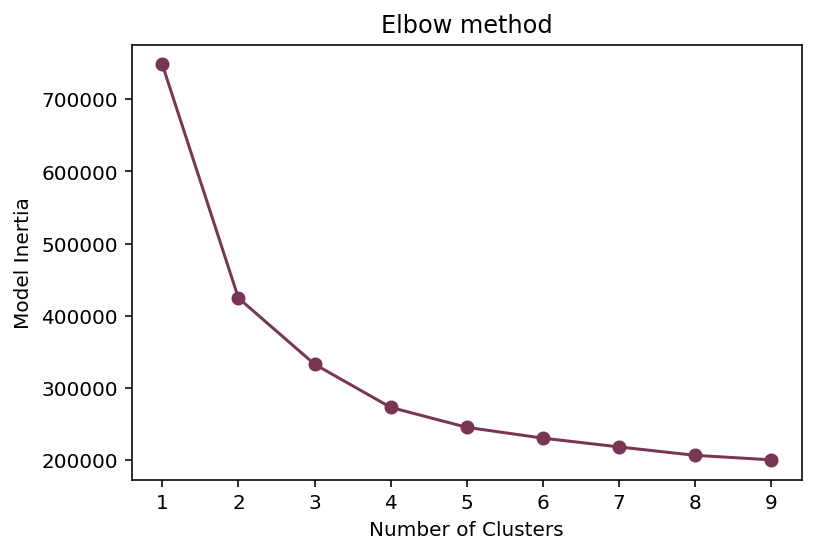

In [365]:
np.random.seed(40)
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k).fit(PCA_components) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia,'-o',color='#783654')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Model Inertia')
plt.show()
#plt.savefig('Elbow_1.png');

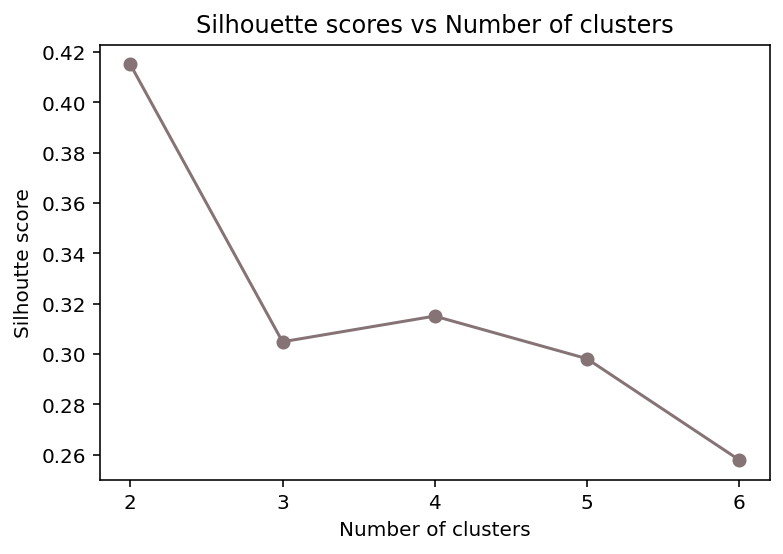

In [366]:
np.random.seed(40)
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(PCA_components, model.labels_) for model in kmeans_models[1:6]]
plt.plot(range(2,7), silhoutte_scores, "bo-",color='#857376')
plt.xticks([2, 3, 4, 5,6])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.savefig('Silhoutte_score.png')
plt.show()

I am now going to plot components with explained variance ration and will visualize the dropoff point of variance.

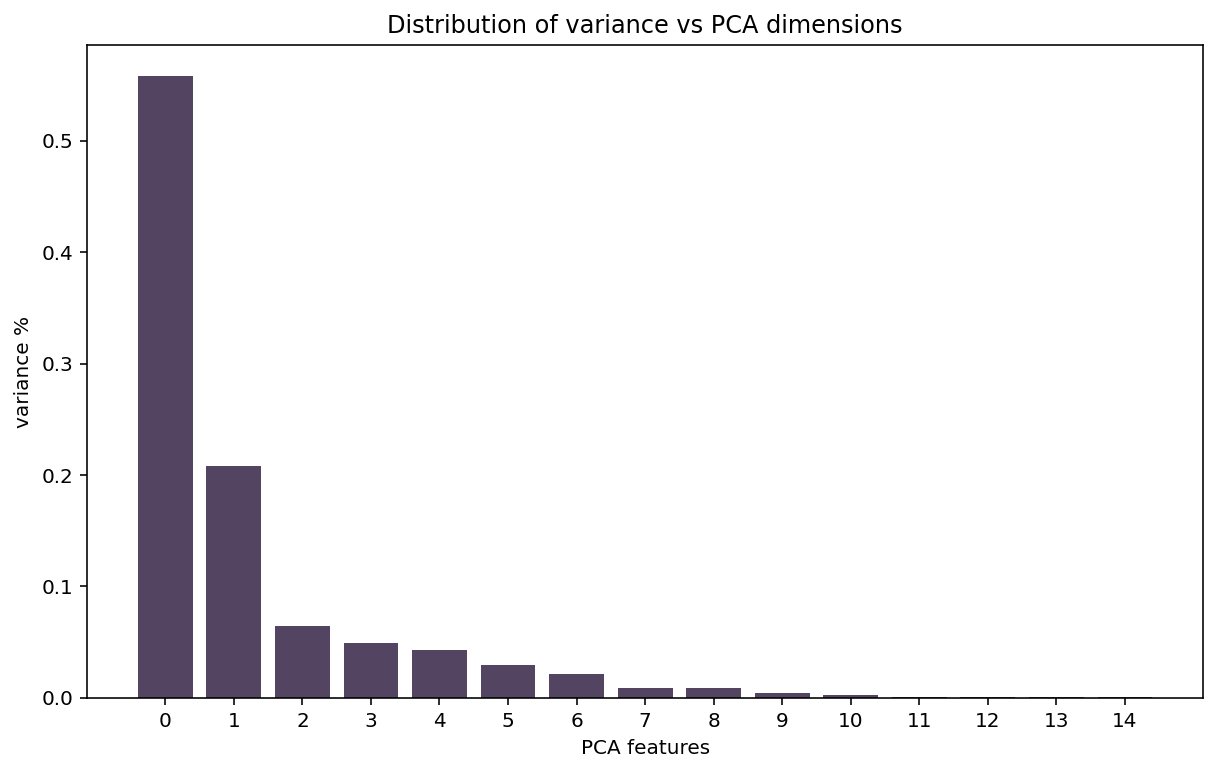

In [368]:
features = range(P_C_A.n_components_)
plt.figure(figsize=(10,6))
plt.bar(features, P_C_A.explained_variance_ratio_, color='#534562')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.title('Distribution of variance vs PCA dimensions')
plt.savefig('PCA_Visualization.png')

In [369]:
PCA_components = pd.DataFrame(p_c_a_output)
PCA_components.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.683241,-1.608853,0.682837,-1.184203,-0.232142,-0.582650,-0.175566,0.079722,0.398632,-0.108185,-0.168218,0.227383,0.103038,0.031331,-0.023641
1,-1.713726,-1.691578,0.119895,0.002748,-1.100827,0.154179,-0.208872,-0.172454,-0.176603,0.302314,0.093724,-0.005877,0.025620,0.042066,0.040903
2,-0.730634,-1.720128,1.279085,0.380437,-0.403909,0.046084,-0.388776,-0.038300,0.134539,-0.076398,0.071011,-0.059717,0.036217,-0.001153,-0.094368
3,-1.637826,-0.595052,-1.150729,-0.473177,-0.284026,-0.376006,-0.028976,-0.066492,0.021220,0.063278,0.055223,0.156874,-0.047974,-0.072766,-0.062031
4,-1.675780,0.304877,1.342686,0.499388,-0.456177,0.056567,-0.360535,-0.156199,-0.200467,-0.137048,-0.031717,-0.010408,0.023880,0.010735,0.019754


In [370]:
PCA_components.shape

(76387, 15)

##### Applying K-Means Clustering 

In [371]:
three_pcd_df=PCA_components.iloc[:,:3]
three_pcd_df

,0,1,2
0,-1.683241,-1.608853,0.682837
1,-1.713726,-1.691578,0.119895
2,-0.730634,-1.720128,1.279085
3,-1.637826,-0.595052,-1.150729
4,-1.675780,0.304877,1.342686
...,...,...,...
76382,0.302100,-1.660494,0.986426
76383,-0.630449,0.372451,0.075017
76384,-1.616814,0.394769,-0.197544
76385,-1.655773,-0.583101,-0.726981


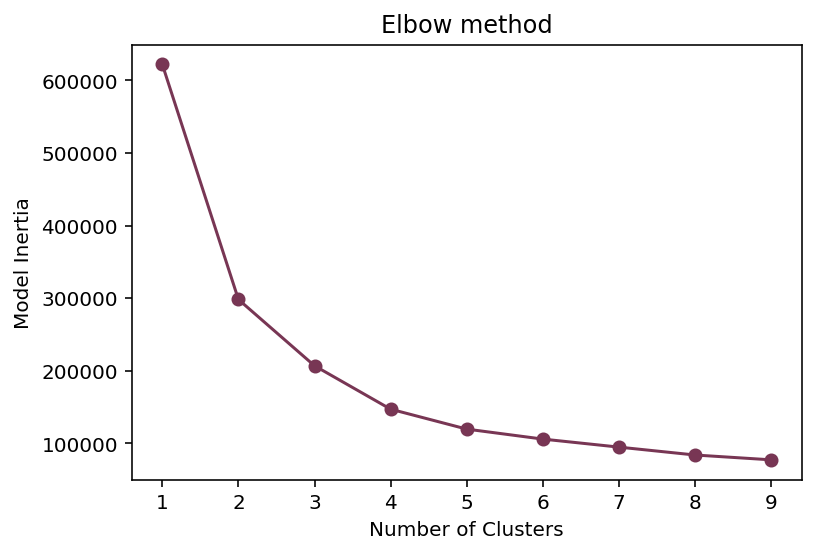

<Figure size 432x288 with 0 Axes>

In [372]:
np.random.seed(40)
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k).fit(three_pcd_df) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia,'-o',color='#783654')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Model Inertia')
plt.show()
plt.savefig('Elbow_1.png');

In [373]:
innertia

[622009.0635412287,
 298258.54168860166,
 206924.36638304495,
 147138.69048534665,
 119683.06085670253,
 105937.8185511075,
 94876.40273429207,
 84002.17620209277,
 77350.82118082097]

As the elbow is breaking at 2. So their may be 2 possible Clusters for this dataset. But this can be confirmed by using `Silhouette score`

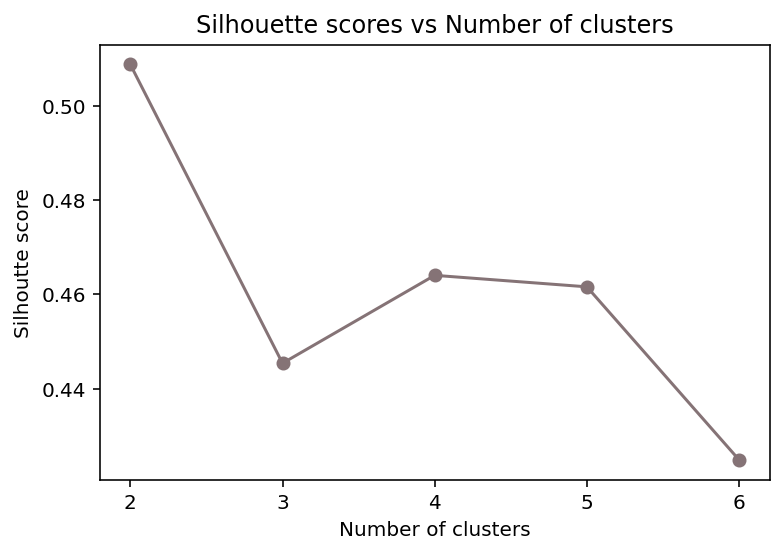

In [374]:
np.random.seed(40)
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(three_pcd_df, model.labels_) for model in kmeans_models[1:6]]
plt.plot(range(2,7), silhoutte_scores, "bo-",color='#857376')
plt.xticks([2, 3, 4, 5,6])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.savefig('Silhoutte_score.png')
plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. 

The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.


The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

As the plot of silhouette score is showing that this dataset can be cluster to 2 groups

In [375]:
np.random.seed(40)
from sklearn.metrics import silhouette_score

clustering = KMeans(n_clusters=2)
clustering.fit(three_pcd_df)

print('Silhoutte score of K-Mean clustering is ' + str(silhouette_score(three_pcd_df, clustering.labels_)))

Silhoutte score of K-Mean clustering is 0.508699887328823


##### Concetanating labels with PCA components for visualisation

In [376]:
three_pca_df = pd.concat([three_pcd_df, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)
three_pca_df

,0,1,2,pca_clusters
0,-1.683241,-1.608853,0.682837,0
1,-1.713726,-1.691578,0.119895,0
2,-0.730634,-1.720128,1.279085,0
3,-1.637826,-0.595052,-1.150729,0
4,-1.675780,0.304877,1.342686,0
...,...,...,...,...
76382,0.302100,-1.660494,0.986426,0
76383,-0.630449,0.372451,0.075017,0
76384,-1.616814,0.394769,-0.197544,0
76385,-1.655773,-0.583101,-0.726981,0


In [377]:
three_pcd_df.shape

(76387, 3)

In [378]:
clustering_df.shape

(76387, 89)

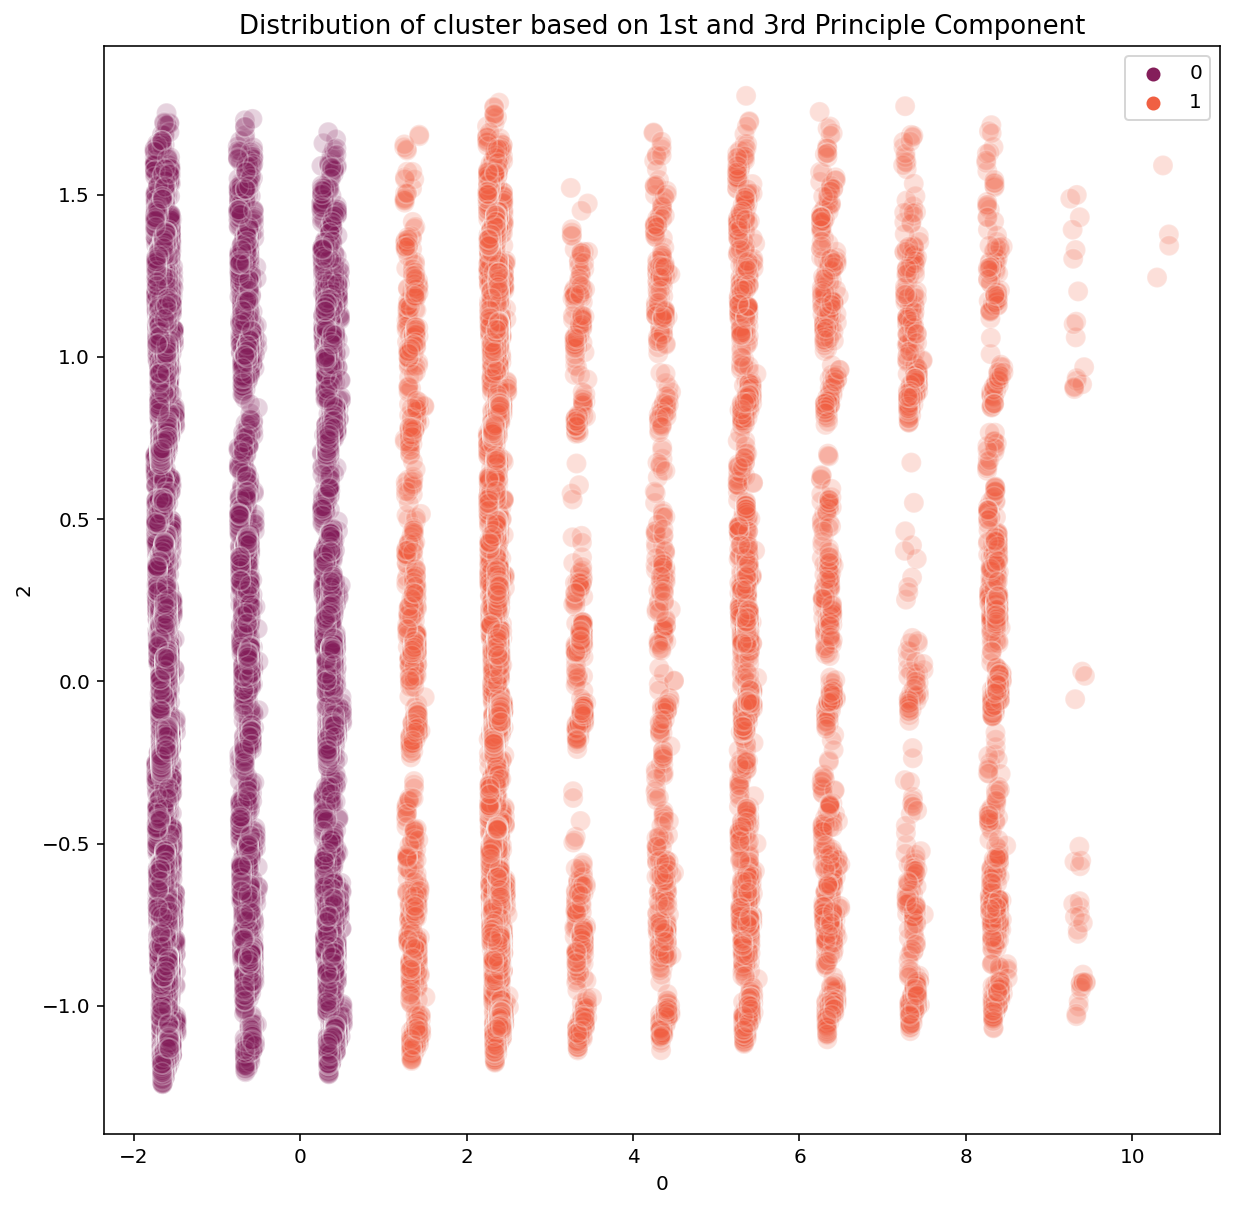

In [396]:
plt.figure(figsize = (10,10))
sns.scatterplot(three_pcd_df.iloc[:,0],three_pca_df.iloc[:,2], hue=three_pca_df['pca_clusters'], palette='rocket', s=100, alpha=0.2).set_title('Distribution of cluster based on 1st and 3rd Principle Component',fontsize=13)
plt.legend()
plt.savefig('Cluster_pCA_1_and_3')
plt.show()

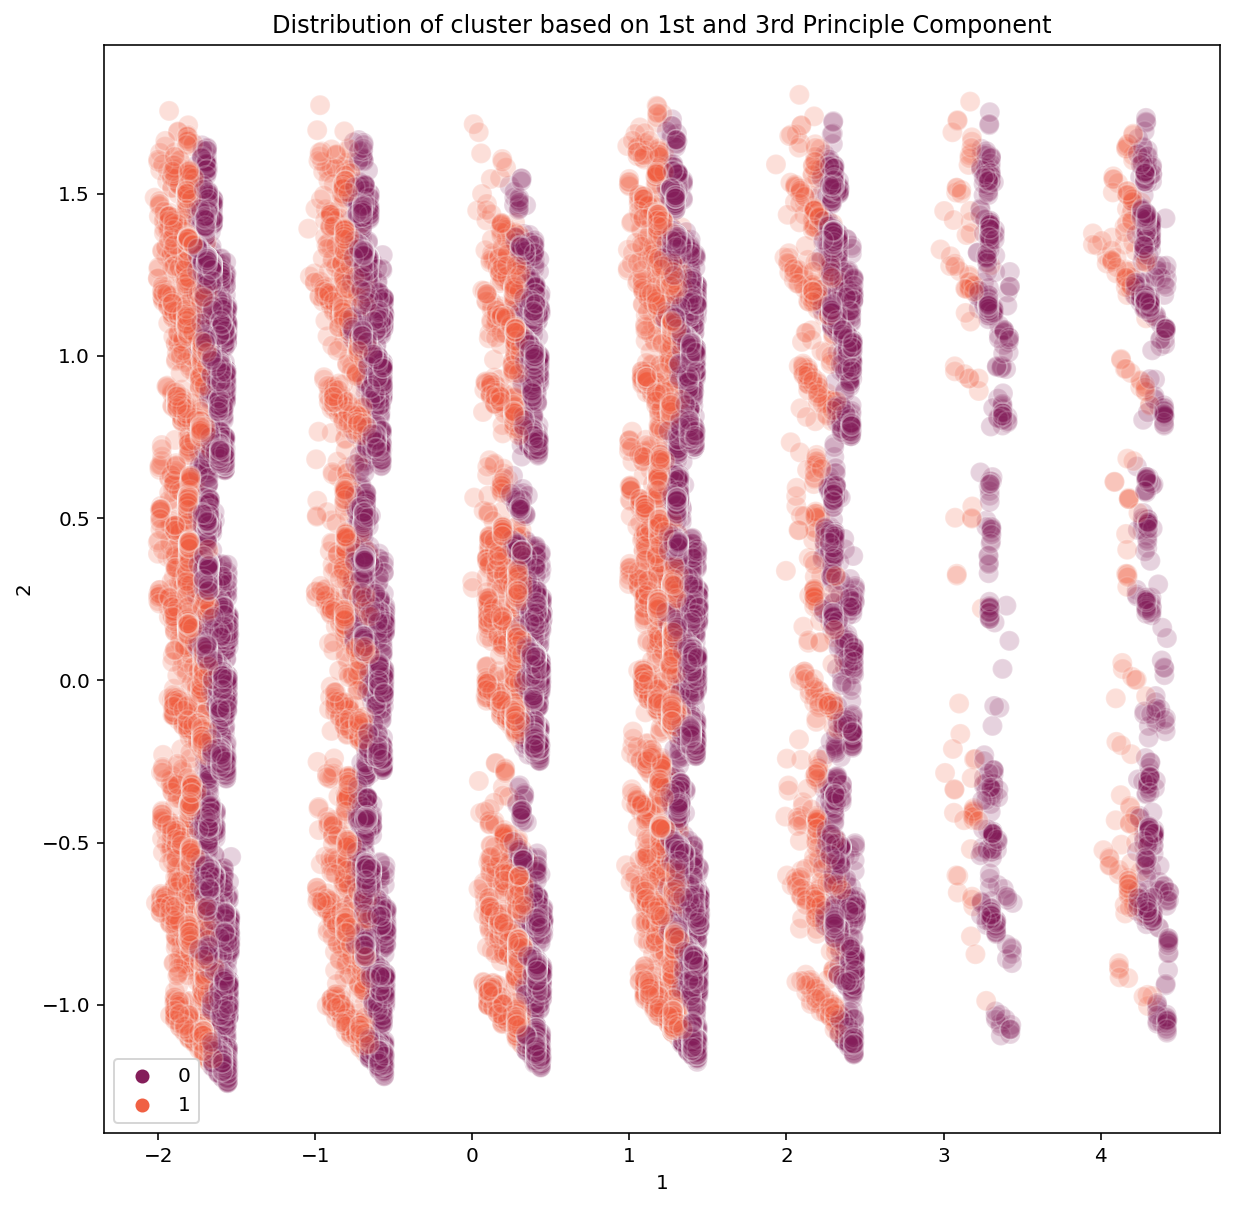

In [382]:
plt.figure(figsize = (10,10))
sns.scatterplot(three_pcd_df.iloc[:,1],three_pca_df.iloc[:,2], hue=three_pca_df['pca_clusters'], palette='rocket', s=100, alpha=0.2).set_title('Distribution of cluster based on 1st and 3rd Principle Component')
plt.legend()
plt.savefig('Cluster_pCA_1_and_3')
plt.show()

##### Concetanating Labels with Original Dataframe

In [388]:
clustering_df.iloc[:,0:10]

,home_ownership,loan_amnt,int_rate,installment,grade,annual_inc,verification_status,purpose,dti,delinq_2yrs
0,1.0,0.229779,9.880515e-07,0.007971,1.0,0.722164,1.0,1.0,0.000060,0.000000
1,1.0,0.094834,6.358413e-07,0.002211,1.0,0.243860,2.0,1.0,0.000093,0.000000
2,2.0,0.114601,8.067941e-07,0.002671,1.0,0.424025,1.0,2.0,0.000105,0.000000
3,1.0,0.135571,1.612453e-06,0.004972,2.0,0.491447,3.0,1.0,0.000246,0.000000
4,2.0,0.040447,1.499900e-07,0.000838,3.0,0.158450,1.0,1.0,0.000039,0.000000
...,...,...,...,...,...,...,...,...,...,...
77154,2.0,0.007844,3.372812e-07,0.000272,1.0,0.244277,1.0,3.0,0.000073,0.000000
77155,2.0,0.003711,1.478987e-07,0.000116,3.0,0.334025,2.0,2.0,0.000020,0.000000
77156,1.0,0.029372,2.232267e-07,0.000885,3.0,0.621007,2.0,1.0,0.000047,0.000000
77157,3.0,0.044879,7.012289e-07,0.001668,2.0,0.192838,3.0,1.0,0.000036,0.000004


In [383]:
len(clustering.labels_)

76387

In [384]:
clustering_df['cluster_id']=clustering.labels_

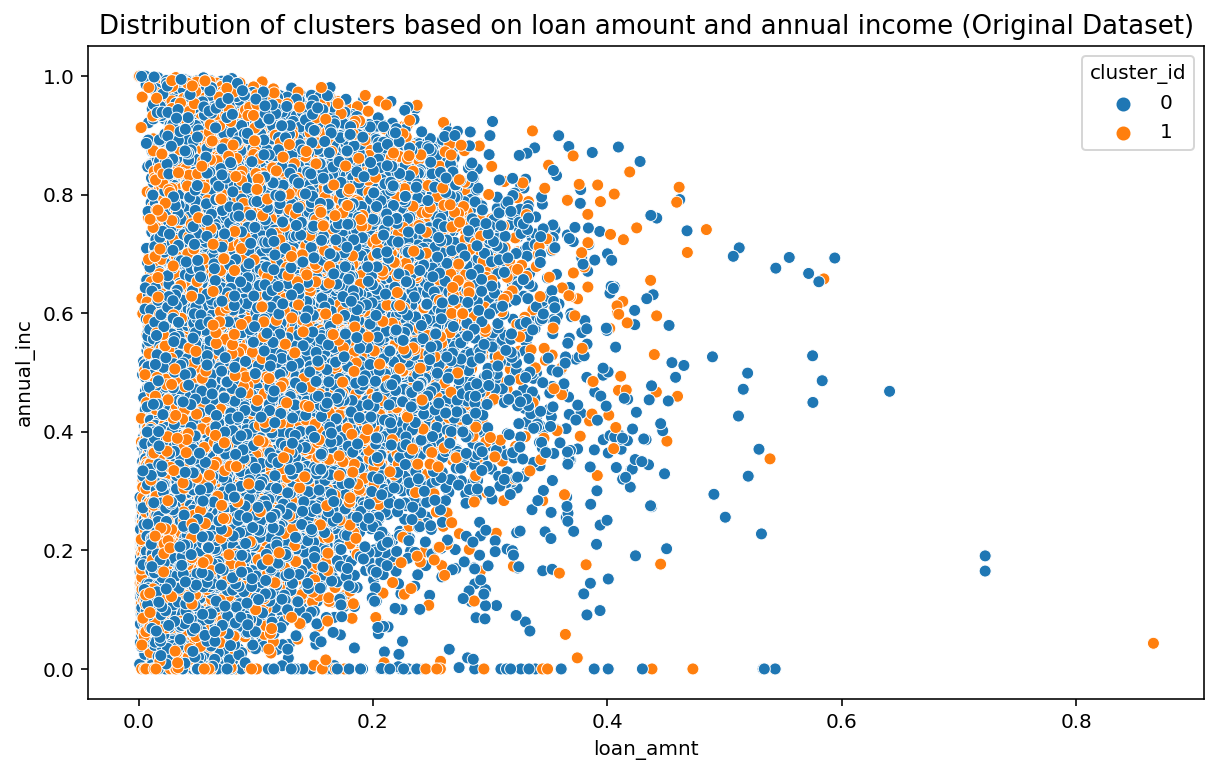

In [395]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=clustering_df, x='loan_amnt', y='annual_inc', hue='cluster_id')
plt.title('Distribution of clusters based on loan amount and annual income (Original Dataset)',fontsize=13)
plt.savefig('final_pic.png')
plt.show()

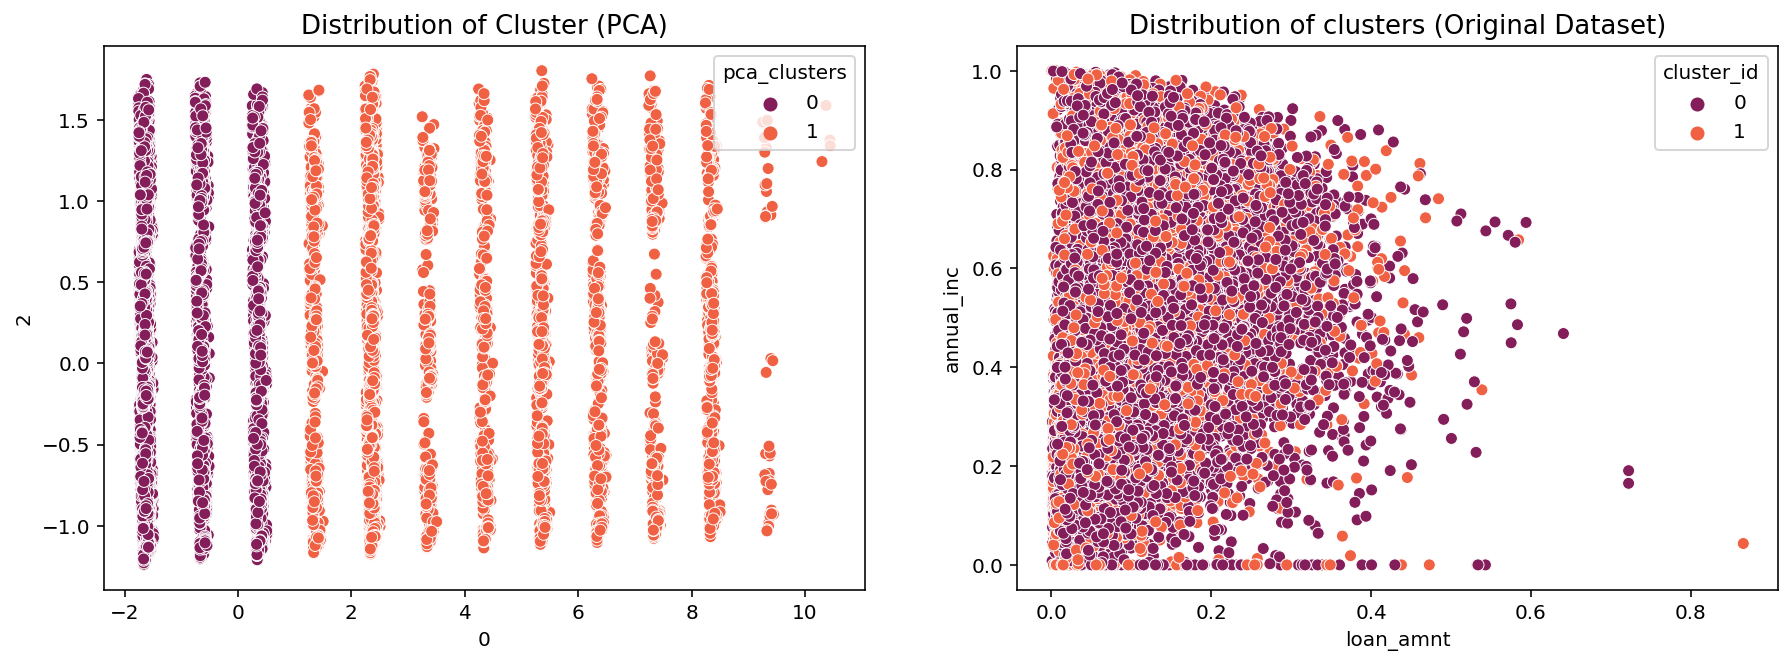

In [403]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.scatterplot(x=three_pcd_df.iloc[:,0],y=three_pca_df.iloc[:,2],hue=three_pca_df['pca_clusters'],ax=ax[0],palette='rocket')
ax[0].set_title('Distribution of Cluster (PCA)',fontsize=13)
sns.scatterplot(x='loan_amnt',y='annual_inc',data=clustering_df,hue='cluster_id',ax=ax[1],palette='rocket')
ax[1].set_title('Distribution of clusters (Original Dataset)',fontsize=13);
plt.savefig('Clusters.png')
